<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<b><center><font size="6">Cours - Econométrie en finance - Séance 7</font></center></b>
    
<g><h7><center> CM - P. Durand  - pierre.durand@u-pec.fr </center></h7></g>

<g><h7><center> TD - A. Birem  - abderraouf.birem@etu.u-pec.fr </center></h7></g>


<b><center><font size="5">M1 - 2024-2025</font></center></b> 



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">


 


<br>
<b>Plan du cours : </b>

- Séance 1 – Introduction générale & Introduction avancée à Python
- Séance 2 – Rappels économétriques et bases de données sous python
- Séance 3 – Modèle de régression simple
- Séance 4 - Modèle de régression multiple
- Séance 5 – Violation des hypothèses (1)
- Séance 6 – Violation des hypothèses (2)
- <b>Séance 7 – Caractéristiques des séries temporelles</b>
- Séance 8 – Stationnarité et conséquences, tests de racine unitaire
- Séance 9 – Modélisation en série temporelles : ARMA-ARCH
- Séance 10 - Modèles VAR et correction d'erreur
- Séance 11 – Introduction aux modèles de classification : logit



<b>Références en Econométrie</b> :

- Pesaran, M. H. (2015). Time series and panel data econometrics. Oxford University Press.

- Bourbonnais, R. (2008), Econométrie, Dunod, 7e édition.

- Mignon, V. (2008), Econométrie : Théorie et applications.

- Lardic, S. & Mignon, V. (2002), Econométrie des séries temporelles macroéconomiques et financières.


<b>Références pour la finance</b>  :

-	Finance de marché (Portait – Poncet)
-	Recent advances in linear models and related areas (Shalabh – Heumann)

<b>Références pour python</b>  :

- Presque tout est gratuit et en open source sur internet
- Liste non exhaustive de livres : <a href="https://python.developpez.com/livres/"> python.developper</a>



<br>
<hr style=" border: .5px solid black;">

<a id='plan'></a>
<br>
<b>Séance 7 : </b>


- [Introduction](#p0)
- [1. Modèles dynamiques](#p1)
    - [1.1 Quelques exemples](#p1.1)
    - [1.2 Modèles à retards échelonnés](#p1.2)
    - [1.3 Modèles à retards échelonnés autorégressifs](#p1.3)
    - [1.4 Application](#p1.4)
- [2. Caractéristiques des séries temporelles](#p2)
    - [2.1 Saisonnalité](#p2.1)
    - [2.2 Stationnarité au second ordre](#p2.2)
    - [2.3 Fonction d'autocovariance, d'autocorrélation et d'autocorrélation partielle](#p2.3) 
 





    
    



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: 2.5px solid black;">


# Introduction <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p0'></a>

  
    




</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<b>Exemple de série temporelle</b> : la série de prix des actions de Ford (cf TD).

La fréquence : heure daily etc    
    
</span>

In [18]:
# package pour la manipulation de données
import pandas as pd

In [19]:
# importation de la base de données capm
df = pd.read_csv("data/capm2.txt", sep=";")

In [20]:
# visualisation de l'entête du dataframe
df.head()

,date,ford,sandp,ustb3m,oil
0,2001-01-01,15.454666,1366.010010,4.84,28.700001
1,2001-02-01,15.411097,1239.939941,4.72,27.420000
2,2001-03-01,15.582887,1160.329956,4.18,26.400000
3,2001-04-01,16.336536,1249.459961,3.83,26.400000
4,2001-05-01,13.631827,1255.819946,3.54,28.370001


spécifier le modèle ou anticiper la valeur des resultats

spécifier le modèle : 
- choix des variables
- forme fonctionnel (inclure de la dynamique ou pas)

<Axes: title={'center': "Evolution d'action de ford"}, xlabel='date'>

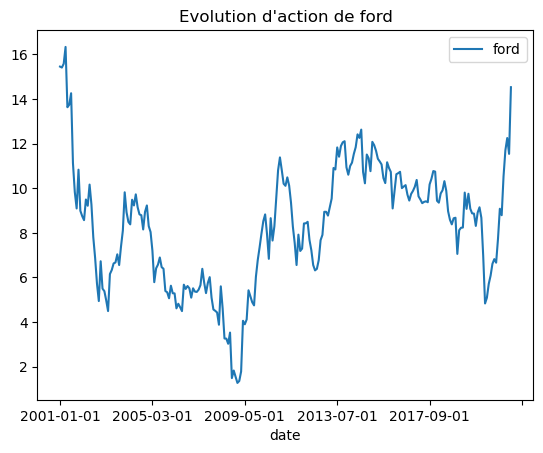

In [21]:
df.plot(x = "date",y="ford", legend=True, title="Evolution d'action de ford")

ça ressemble à une marché aléatoire c'est volatile on le voit en apperçevant des variation locale 

<Axes: title={'center': "Evolution d'action de S&P"}, xlabel='date'>

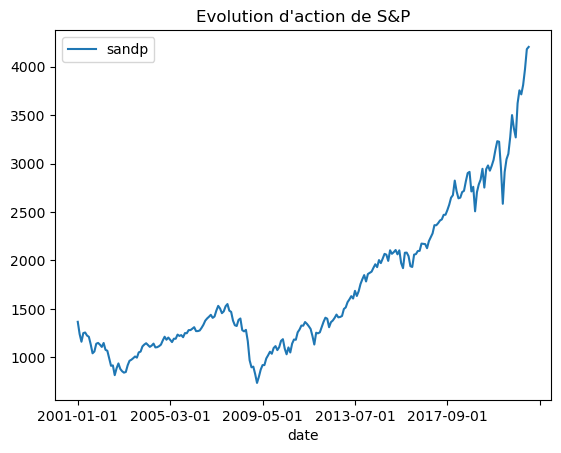

In [22]:
df.plot(x = "date",y="sandp", legend=True, title="Evolution d'action de S&P")

<Axes: title={'center': "Evolution d'action de oil"}, xlabel='date'>

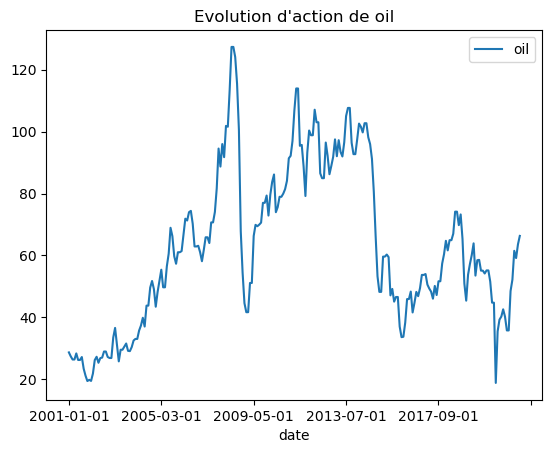

In [23]:
df.plot(x = "date",y="oil", legend=True, title="Evolution d'action de oil")

<Axes: title={'center': "Evolution d'action de gr_ford"}, xlabel='date'>

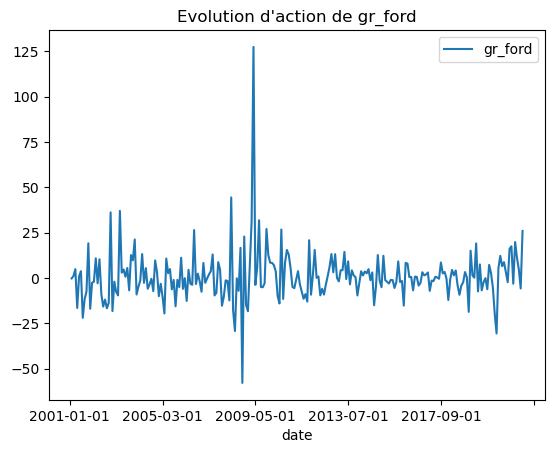

In [24]:
df["gr_ford"] = 100 * (df["ford"]/df["ford"].shift(1) -1)
# ou tout simplement : df["gr_ford"] = df["ford"].pct_change()

df.plot(x = "date",y="gr_ford", legend=True, title="Evolution d'action de gr_ford")

C'est hétéroscédastique

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<b>Exemple de série temporelle autorégressive</b> : 
- évolution du bitcoin 
- interval plus réduit : journalier, mois de juin 2021
- structure de marche aléatoire ?

</span>

In [25]:
# pour scrapper
import requests as rq
from bs4 import BeautifulSoup as bs
import json
import datetime as dt
from io import StringIO

In [26]:
# Données pour le crude oil
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

url_base = "https://query1.finance.yahoo.com"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00
symbol = "BTC-EUR"
period1 = int(dt.datetime(2021,6,1).timestamp())
period2 = int(dt.datetime(2021,7,1).timestamp())
interval = "1d"

url_suite = "/v7/finance/download/%s?period1=%s&period2=%s&interval=%s" % (symbol, period1, period2, interval)

full_url = url_base + url_suite

resp = rq.get(full_url, headers=headers).text

str_io = StringIO(resp)


# création dataframe
data_bitcoin = pd.read_csv(str_io, sep=",")

# calcul de la série des rendements
data_bitcoin["gr_close"] = (data_bitcoin["Adj Close"] / data_bitcoin["Adj Close"].shift(1) -1 )*100

KeyError: 'Adj Close'

In [27]:
data_bitcoin.head()

,"{""finance"":{""result"":null","error:{""code"":""unauthorized""","description:""User is not logged in""}}}"


In [28]:
data_bitcoin.plot(x = "Date", y="Close", legend=True)

KeyError: 'Date'

c'est une marche aléatoire, c'est un processus autoregressif d'ordre 1

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<b>Exemple de décomposition de la saisonnalité du bitcoin</b> : 


</span>

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [30]:
analysis = data_bitcoin.set_index('Date')[["Close"]].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", period = 4)

data_bitcoin["trend"] = [i for i in decompose_result_mult.trend]
data_bitcoin["seasonal"] = [i for i in decompose_result_mult.seasonal]
data_bitcoin["residual"] = [i for i in decompose_result_mult.resid]

KeyError: "None of ['Date'] are in the columns"

In [ ]:
data_bitcoin.plot("Date","trend", figsize=(8,3))
data_bitcoin.plot("Date","seasonal", figsize=(8,3))
data_bitcoin.plot("Date","residual", figsize=(8,3))

 $$Close = trend + saisonnalité + résidus$$

- puger une série de la saisonnalité 


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: 2.5px solid black;">
      
# Modèles dynamiques <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p1'></a>

  
## Quelques exemples <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p1.1'></a>    

<br>

- Pourquoi introduire des retards ? 

 inclure de la causalité temporel
    
 La variable expliquer peut dépendre de ses propres retards
    
<br>
    
- Dans quel cadre les utiliser ? 

En finance de marché
    
En analyse financière : analyse chartiste
    
prévision autoregressive
    
persistence et effet structurel
    
    
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">
 

  
## Modèles à retards échelonnés <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p1.2'></a>    

    
<b>Ecritures et définitions</b>
    
    
<br>
    
- On note $h$ le nombre de retards.
- Un modèle à retards échelonnés s'écrit alors :
    
$$Y_t = \mu + \delta_0 X_t + \delta_1 X_{t-1} + \delta_2 X_{t-2} + ... + \delta_h X_{t-h} + \epsilon_t$$
    
<br>
    
- Bien sûr, nous pouvons avoir plusieurs variables explicatives retardées : 
    
$$Y_t = \mu + \delta_{1,0} X_{1,t} + \delta_{1,1} X_{1,t-1} + \delta_{1,2} X_{1,t-2} + ... + \delta_{1,h} X_{1,t-h}\\
+ \delta_{2,0} X_{2,t} + \delta_{2,1} X_{2,t-1} + \delta_{2,2} X_{2,t-2} + ... + \delta_{2,h} X_{2,t-h}\\
+ \delta_{3,0} X_{3,t} + \delta_{3,1} X_{3,t-1} + \delta_{3,2} X_{3,t-2} + ... + \delta_{3,h} X_{3,t-h}\\
+ \epsilon_t$$  

<br>
    
- Pour simplifier la notation, nous introduisons l'opérateur retard $L$ :
    
$$LX_t = X_{t-1}$$
    
- Et de façon généralisée, nous avons : 
    
$$L^iX_t = X_{t-i}$$
    
<br>
    
- De là nous pouvons également définir le polynôme retard $D_h(L)$ de degré $h$ tel que :
    
$$D_h(L) = \delta_0 + \delta_1 L + \delta_2 L^2 + ... + \delta_h L^h$$
    
- De cette manière, nous pouvons réécrire le premier modèle comme suit : 
    
$$ Y_t = \mu + D_h(L) X_t + \epsilon_t $$
    
    
<br> 
    
- Interprétation : 
    - $\delta_0$ : multiplicateur de court terme ($\frac{\Delta Y_t}{\Delta X_t}$)
    - la somme pour $i$ de $0$ à $k$ des $\delta_i$ ($\sum_{i=0}^k \delta_i$) : multiplicateurs cumulés (effet sur $k$ périodes)
    
<br>
    
    
- Exemple : Le modèle keynésien

$$ C_t=\mu +0.4R_t+0.2R_{t-1}+0.1R_{t-2} $$
    
    
    
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<br>
    
<b>Nombre de retards et estimation</b>
    
    
<br>
    
- Plusieurs manières de déterminer le nombre de retards :

    
   regarder la significativité des coefficients 
    
   Estimer plusieur modèle avec plusieurs retard 
  
<br>
    
- Comme évoqué plus haut : introduction des retards peut altérer l'estimation MCO
 
    retard peut générer de la multicolinéarité 
    
    retard peut générer de l'autocorrélation
    
 Estimation imprécise et ecart type trop élévé 
    
 Hypothèse sur la forme des retards

<br>
    
   
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<br>
    
<b>Modèles à retards échelonnés</b>
    
   
- Appelés <i>Polynomial Distributed Lag model</i> (PDL).
    
<br>
    
- On s'intéresse au modèle initial ici : 
    
$$Y_t = \mu + \delta_0 X_t + \delta_1 X_{t-1} + \delta_2 X_{t-2} + ... + \delta_h X_{t-h} + \epsilon_t$$
    
- Almon (1962) a mis au point une technique qui permet d'éviter une estimation directe des $\delta$ : transformation du modèle pour procéder à une estimation MCO.
    
- L'idée est que la distribution des coefficients $\delta$ peut être approximée par un polynôme : 
    
$$ \delta_k = \alpha_0 + \alpha_1 k + \alpha_2 k^2 + ... + \alpha_q k^q = \sum_{i=0}^q \alpha_i k^i$$
    
- Par exemple, si l'on prend un polynôme d'ordre $2$ :
    - $ \delta_0 = \alpha_0 $
    - $ \delta_1 = \alpha_0 + \alpha_1 + \alpha_2 $
    - $ \delta_2 = \alpha_0 + \alpha_1 2 + \alpha_2 2^2 $
    - ...
    - $ \delta_h = \alpha_0 + \alpha_1 h + \alpha_2 h^2 $
    
    
<br>
    
- d'où, le modèle se réécrit :    

$$Y_t = \mu + \alpha_0 X_t + \delta_1 X_{t-1} + (\alpha_0 + \alpha_1 + \alpha_2) X_{t-2} + ... + (\alpha_0 + \alpha_1 h + \alpha_2 h^2) X_{t-h} + \epsilon_t$$

    
- de là, nous pouvons réécrire le modèle sous forme matricielle :     
    
$$Y = I\mu + X\delta + \epsilon\\
= I\mu + XW\alpha + \epsilon$$
    
<br>
    
où 
    
    
$$W = 
\begin{pmatrix}
1 & 0 & 0 & ... & 0\\
1 & 1 & 1 & ... & 1\\
1 & 2 & 2^2 & ... & 2^q \\
\vdots & \vdots & \vdots & ... & \vdots\\
1 & h & h^2 & ... & h^q \\
\end{pmatrix}
$$
    
$$\alpha = 
\begin{pmatrix}
\alpha_0 \\
\alpha_1 \\
\alpha_2 \\
\vdots  \\
\alpha_h\\
\end{pmatrix}
$$
    
<br>
    
- Ainsi, nous avons un modèle que l'on peu estimer par les MCO :
    - $\hat{\alpha} = ((XW)(XW)')^{-1}(XW)'Y$
    - et on retrouve : $\hat{\delta} = W\hat{\alpha}$
    
<br>
    
    
- En pratique, il peut nous manquer $q$ : 
    - estimation du modèle avec le plus de retards
    - tester la significativité du dernier retard
    - procéder à une estimation sans ce retard s'il n'est pas significatif
    - continuer ainsi jusqu'à n'avoir que des retards significatifs
    
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">
 


  
## Modèles à retards échelonnés autorégressifs <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p1.3'></a>    


- Dans de nombreux cas (séries financières par exemple) : la variable endogène dépend de ses propres retards.
- On parle de processus autorégressifs :
 
<br>
    
$$Y_t = \mu + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + ... + \phi_p Y_{t-p} +\epsilon_t$$
    
<br>

- Le cas le plus connu étant celui de la marche aléatoire : la valeur d'aujourd'hui est la même que celle d'hier à un bruit prêt (finance ou météo).
    
$$Y_t = \mu + \phi_1 Y_{t-1} +\epsilon_t$$   

    
<br>
</span>

In [31]:
import numpy as np
import matplotlib.pyplot as plt

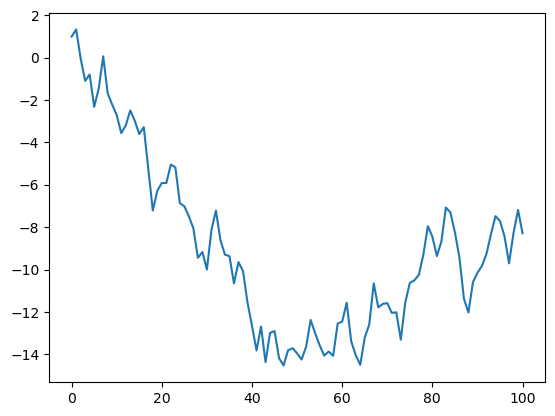

In [32]:
init = 1
X = [init]

obs = 0

while obs < 100 :
    epsilon = np.random.normal(0,1)
    X.append(X[-1] + epsilon)
    obs += 1
    
    
plt.plot(X)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<br>
    
- ARDL : <i>AutoRegressive Distributed Lag</i> (on a donc les deux)
    

    
    
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">



  
## Application <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p1.4'></a>    

<br>
    
    
- Nous reprenons les données utilisées en cours pour étudier le CAPM
    
<br>
    
$$ford_t = \mu + \delta_1 sand_t  + \epsilon_t$$
    
<br>
    
    
- L'idée est que la rentabilité espérée d'un titre est déterminée par celle du marché
- Nous étendons ce modèle de trois façons : 
    - introduction d'une nouvelle variable explicative
    - introduction d'un retard dans les variables explicatives
    - introduction d'un retard dans la variable expliquée
    
$$ford_t = \mu + \phi ford_{t-1} + \delta_1 sand_t + \delta_2 sand_{t-1} + \gamma_1 oil_t + \gamma_2 oil_{t-1} + \epsilon_t$$
    
    
AR 1 DL 1
<br>
</span>

In [33]:
df = pd.read_csv("data/capm2.txt", sep=";")

In [34]:
df.head()

,date,ford,sandp,ustb3m,oil
0,2001-01-01,15.454666,1366.010010,4.84,28.700001
1,2001-02-01,15.411097,1239.939941,4.72,27.420000
2,2001-03-01,15.582887,1160.329956,4.18,26.400000
3,2001-04-01,16.336536,1249.459961,3.83,26.400000
4,2001-05-01,13.631827,1255.819946,3.54,28.370001


In [35]:
df["rsandp"] = 100 * ( df["sandp"]/df["sandp"].shift(1) - 1 )
df["rford"] = 100 * ( df["ford"]/df["ford"].shift(1) - 1 )
df["roil"] = 100 * ( df["oil"]/df["oil"].shift(1) - 1 )


df["ersandp"] = df["rsandp"] - df["ustb3m"]
df["erford"] = df["rford"] - df["ustb3m"]

In [36]:
# création des variables
df["erford_1"] = df["erford"].shift(1)
df["ersandp_1"] = df["ersandp"].shift(1)
df["roil_1"] = df["roil"].shift(1)

In [37]:
df.head()

,date,ford,sandp,ustb3m,oil,rsandp,rford,roil,ersandp,erford,erford_1,ersandp_1,roil_1
0,2001-01-01,15.454666,1366.010010,4.84,28.700001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-02-01,15.411097,1239.939941,4.72,27.420000,-9.229074,-0.281915,-4.459934,-13.949074,-5.001915,NaN,NaN,NaN
2,2001-03-01,15.582887,1160.329956,4.18,26.400000,-6.420471,1.114716,-3.719912,-10.600471,-3.065284,-5.001915,-13.949074,-4.459934
3,2001-04-01,16.336536,1249.459961,3.83,26.400000,7.681436,4.836389,0.000000,3.851436,1.006389,-3.065284,-10.600471,-3.719912
4,2001-05-01,13.631827,1255.819946,3.54,28.370001,0.509019,-16.556196,7.462125,-3.030981,-20.096196,1.006389,3.851436,0.000000


In [38]:
# suppréssion des valeurs manquantes
df1 = df.dropna()

In [39]:
# check les corrélations pour éventuelle multicolinéarité
df1.corr()

C:\Users\issak\AppData\Local\Temp\ipykernel_20092\2406342233.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,ford,sandp,ustb3m,oil,rsandp,rford,roil,ersandp,erford,erford_1,ersandp_1,roil_1
ford,1.000000,0.379833,-0.275377,-0.060225,0.170958,0.059709,0.022024,0.245978,0.086932,0.063760,0.228976,0.034379
sandp,0.379833,1.000000,-0.161747,-0.062501,0.154286,0.025460,0.048320,0.194417,0.041614,0.028327,0.204433,0.050646
ustb3m,-0.275377,-0.161747,1.000000,-0.172220,-0.067423,-0.116295,0.019297,-0.380251,-0.216876,-0.190831,-0.367088,0.025282
oil,-0.060225,-0.062501,-0.172220,1.000000,0.031401,-0.009193,0.049811,0.083832,0.008629,0.066162,0.152358,0.082938
rsandp,0.170958,0.154286,-0.067423,0.031401,1.000000,0.525499,0.215027,0.948416,0.523412,0.137106,0.120548,0.057060
rford,0.059709,0.025460,-0.116295,-0.009193,0.525499,1.000000,0.136642,0.524086,0.994797,0.010111,0.110043,0.083141
roil,0.022024,0.048320,0.019297,0.049811,0.215027,0.136642,1.000000,0.193197,0.132322,0.261600,0.282560,-0.002802
ersandp,0.245978,0.194417,-0.380251,0.083832,0.948416,0.524086,0.193197,1.000000,0.554111,0.187733,0.228389,0.044861
erford,0.086932,0.041614,-0.216876,0.008629,0.523412,0.994797,0.132322,0.554111,1.000000,0.029512,0.145811,0.079124
erford_1,0.063760,0.028327,-0.190831,0.066162,0.137106,0.010111,0.261600,0.187733,0.029512,1.000000,0.550450,0.131573


In [40]:
# autre solution pour les corrélation (quand on a beaucoup de variables) : heatmap

import matplotlib.pyplot as plt
from matplotlib import cm  
import seaborn as sns 

C:\Users\issak\AppData\Local\Temp\ipykernel_20092\2898950780.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


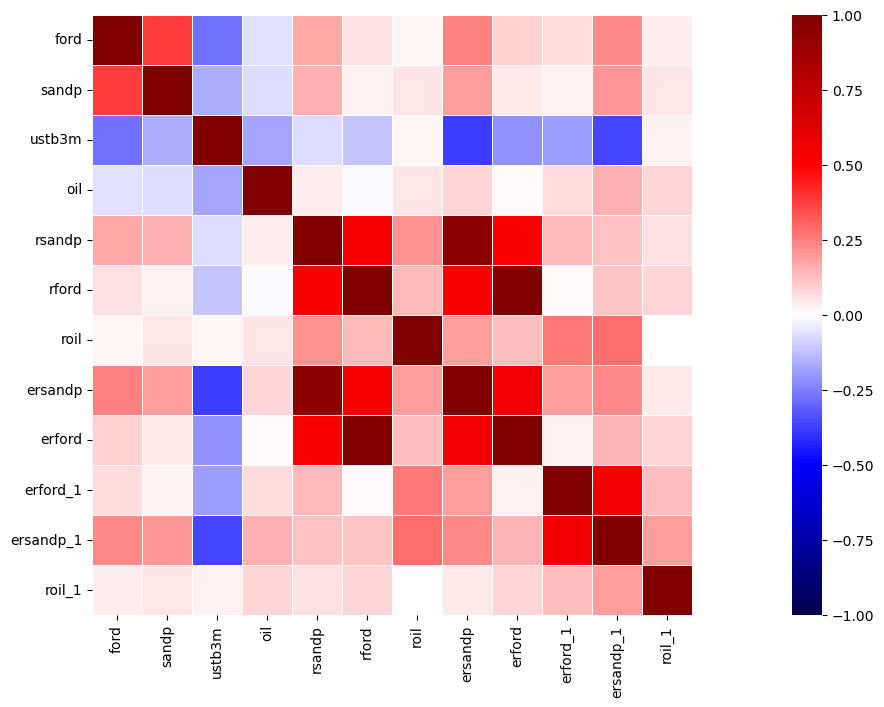

In [41]:
#On règle la taille du graphique
plt.rcParams['figure.figsize'] = (20,10)

#On définie les variables qui vont être utilisées
    #Note : on retire la constante qui semble poser problème dans le calcul des corrélations
corr = df1.corr()

#Définition des axes
f,ax = plt.subplots(figsize=(20, 10))

f.subplots_adjust(top = 0.95, bottom = 0.35,hspace=0.4, right=1, left=0)

#On définit une couleur à partir de la librairie cm
cmap = cm.seismic

#Plotting cmd
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, vmin=-1, linewidths=.5)

plt.show()

La plus significative c'est le S&P 

In [42]:
import statsmodels.api as sm

In [43]:
# estimation du modèle initial (benchmark) (pour comparaison)

X = df1[["ersandp", "roil"]]
X = sm.add_constant(X)

y = df1["erford"]

modele = sm.OLS(y,X)

resultats = modele.fit()

print(resultats.summary())

                            OLS Regression Results                            
Dep. Variable:                 erford   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     53.34
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           6.84e-20
Time:                        15:31:42   Log-Likelihood:                -946.95
No. Observations:                 243   AIC:                             1900.
Df Residuals:                     240   BIC:                             1910.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6986      0.783      0.892      0.3

In [44]:
# estimation du modèle dynamique

X = df1[["erford_1","ersandp","ersandp_1", "roil","roil_1"]]
X = sm.add_constant(X)

y = df1["erford"]

modele_d = sm.OLS(y,X)

resultats_d = modele_d.fit()

print(resultats_d.summary())

                            OLS Regression Results                            
Dep. Variable:                 erford   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     22.54
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           1.78e-18
Time:                        15:31:42   Log-Likelihood:                -944.37
No. Observations:                 243   AIC:                             1901.
Df Residuals:                     237   BIC:                             1922.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6989      0.796      0.878      0.3

L'introduction d'un retard a un effet significatif 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

    
$$ford_t = \mu + \phi ford_{t-1} + \delta_1 sand_t + \delta_2 sand_{t-1} + \gamma_1 oil_t + \gamma_2 oil_{t-1} + \epsilon_t$$
    
<br>
</span>

In [45]:
# importation des fonction pour mener les tests : sphéricité des erreurs

from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

In [46]:
# on récupère le résidu du deuxième modèle
residus_d = resultats_d.resid

In [47]:
# hétéroscedasticité : Breusch Pagan (H0 : homoscédasticité)
stat1 = het_breuschpagan(residus_d, X)
print(stat1)

(8.358711964947009, 0.1375430203879438, 1.6885474438722785, 0.13806793819324226)


In [48]:
# hétéroscedasticité : White (H0 : homoscédasticité)
stat2 = het_white(residus_d, X)
print(stat2)

(104.55284171946487, 1.9129663357477364e-13, 8.382523393759138, 4.4806474804395134e-18)


In [49]:
# test d'autocorrélation (H0 : absence d'autocorrélation)
stat3 = acorr_breusch_godfrey(resultats_d, nlags=10)
print(stat3)

(30.445270823864064, 0.0007241156788690505, 3.2514338795493067, 0.0006062642042237868)


__ERRATUM INTERPRETATION CORRECTION NW__

In [50]:
# résultats avec correction de la matrice de variance covariance
resultat_robust_d = resultats_d.get_robustcov_results(cov_type='HAC', maxlags=100)
print(resultat_robust_d.summary())

                            OLS Regression Results                            
Dep. Variable:                 erford   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     34.15
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           3.26e-26
Time:                        15:31:42   Log-Likelihood:                -944.37
No. Observations:                 243   AIC:                             1901.
Df Residuals:                     237   BIC:                             1922.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6989      1.075      0.650      0.5

In [51]:
# nous pouvons pousser la dynamique du modèle plus loin encore en prenant deux retards :

df["erford_2"] = df["erford"].shift(2)
df["ersandp_2"] = df["ersandp"].shift(2)
df["roil_2"] = df["roil"].shift(2)

In [52]:
# suppréssion des valeurs manquantes
df1 = df.dropna()

In [53]:
# estimation du modèle dynamique

X = df1[["erford_1","erford_2","ersandp","ersandp_1","ersandp_2", "roil","roil_1","roil_2"]].dropna()
X = sm.add_constant(X)

y = df1["erford"].dropna()

modele_d = sm.OLS(y,X)

resultats_d = modele_d.fit()

print(resultats_d.summary())

                            OLS Regression Results                            
Dep. Variable:                 erford   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     14.68
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           2.44e-17
Time:                        15:31:42   Log-Likelihood:                -938.64
No. Observations:                 242   AIC:                             1895.
Df Residuals:                     233   BIC:                             1927.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4812      0.811      0.594      0.5

In [208]:
# résultats avec correction de la matrice de variance covariance
resultat_robust_d = resultats_d.get_robustcov_results(cov_type='HAC', maxlags=100)
print(resultat_robust_d.summary())

                            OLS Regression Results                            
Dep. Variable:                 erford   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     118.9
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           8.10e-78
Time:                        02:34:30   Log-Likelihood:                -938.64
No. Observations:                 242   AIC:                             1895.
Df Residuals:                     233   BIC:                             1927.
Df Model:                           8                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4812      0.755      0.638      0.5

In [202]:
# estimation du modèle dynamique

X = df1[["erford_1","ersandp"]].dropna()
X = sm.add_constant(X)

y = df1["erford"].dropna()

modele_d = sm.OLS(y,X)

resultats_d = modele_d.fit()

print(resultats_d.summary())

                            OLS Regression Results                            
Dep. Variable:                 erford   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     55.47
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           1.63e-20
Time:                        02:33:13   Log-Likelihood:                -941.90
No. Observations:                 242   AIC:                             1890.
Df Residuals:                     239   BIC:                             1900.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6881      0.775      0.888      0.3

C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [206]:
# résultats avec correction de la matrice de variance covariance
resultat_robust_d = resultats_d.get_robustcov_results(cov_type='HAC', maxlags=100)
print(resultat_robust_d.summary())

                            OLS Regression Results                            
Dep. Variable:                 erford   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     27.88
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           1.31e-11
Time:                        02:33:45   Log-Likelihood:                -941.90
No. Observations:                 242   AIC:                             1890.
Df Residuals:                     239   BIC:                             1900.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6881      0.986      0.698      0.4

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<br>
    
    
Il existe désormais sous python des procédures pour sélectionner le bon nombre de retards de façon automatique (voir le package statsmodels, section ARDL).
    
    
    
<br>
    
- Améliorer le modèle : étudier la structure temporelle des séries
    - autocorrélations 
    - stationnarité
    - saisonnalité
    - périodicité peut avoir un rôle important (surtout ici)




</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: 2.5px solid black;">

# Caractéristiques des séries temporelles <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p2'></a>  
    
  
## Saisonnalité <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p2.1'></a>    

    

Saisonnalité : : shéma qui se répête a intervalle donnée <br>
    
- Quelques exemples :


    
</span>

In [211]:
# Données pour le crude oil
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

url_base = "https://query1.finance.yahoo.com"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00
symbol = "^FCHI"
period1 = int(dt.datetime(2021,1,1).timestamp())
period2 = int(dt.datetime(2021,7,1).timestamp())
interval = "1d"

url_suite = "/v7/finance/download/%s?period1=%s&period2=%s&interval=%s" % (symbol, period1, period2, interval)

full_url = url_base + url_suite

resp = rq.get(full_url, headers=headers).text

str_io = StringIO(resp)


# création dataframe
df_cac = pd.read_csv(str_io, sep=",")

<AxesSubplot:xlabel='Date'>

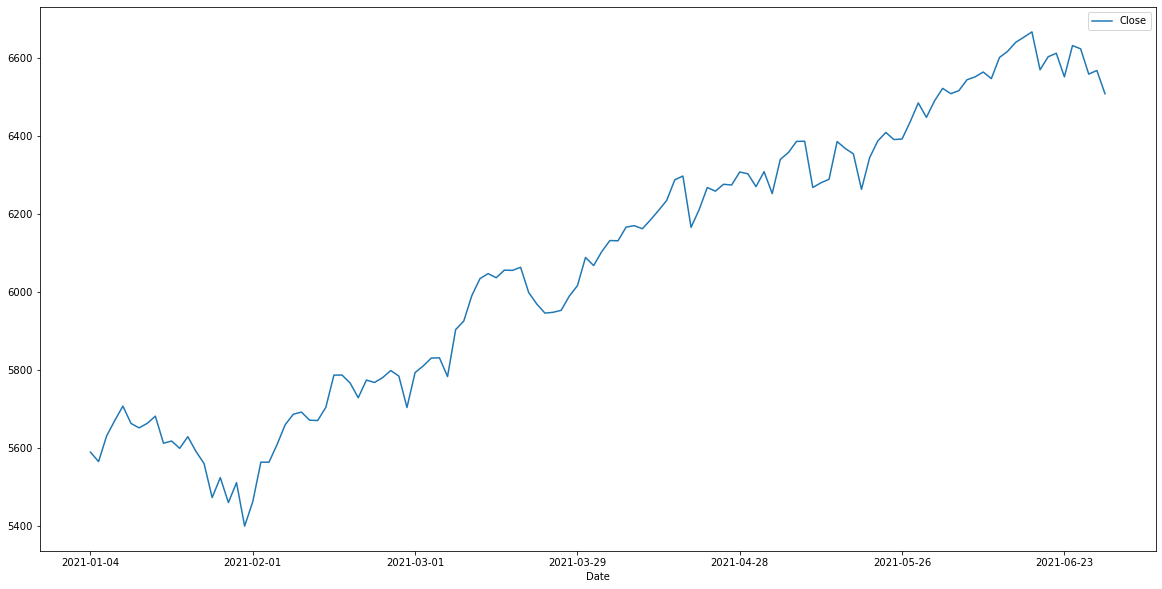

In [212]:
df_cac.plot("Date","Close")

In [244]:
date = [i for i in df_cac.Date]
mondays = []

for i,j in enumerate(date) :
    if np.abs(int(j[-2:]) - int(date[i-1][-2:])) > 1 :
        try :
            if int(j[-2:]) - int(mondays[-1][-2:])<8 :
                mondays.append(j)
        except :
            mondays.append(j)

In [245]:
mondays

['2021-01-04',
 '2021-01-11',
 '2021-01-18',
 '2021-01-25',
 '2021-02-01',
 '2021-02-08',
 '2021-02-15',
 '2021-02-22',
 '2021-03-01',
 '2021-03-08',
 '2021-03-15',
 '2021-03-22',
 '2021-03-29',
 '2021-04-01',
 '2021-04-06',
 '2021-04-12',
 '2021-04-19',
 '2021-04-26',
 '2021-05-03',
 '2021-05-10',
 '2021-05-17',
 '2021-05-24',
 '2021-05-31',
 '2021-06-01',
 '2021-06-07',
 '2021-06-14',
 '2021-06-21',
 '2021-06-28']

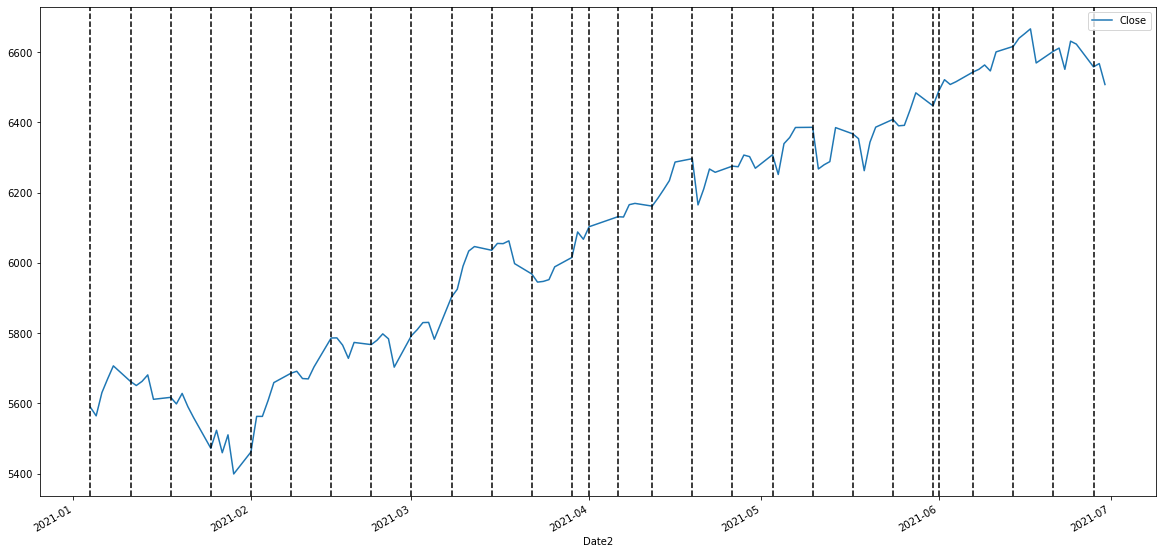

In [246]:
df_cac['Date2'] = pd.to_datetime(df_cac['Date']) 

ax = df_cac.plot(x='Date2', y='Close')

for xc in mondays:
    plt.axvline(x=xc, color='black', linestyle='--')
    
plt.show()

In [271]:
months = []

for i in date :
    if int(i[-2:]) in [14,15,16] :
        months.append(i)

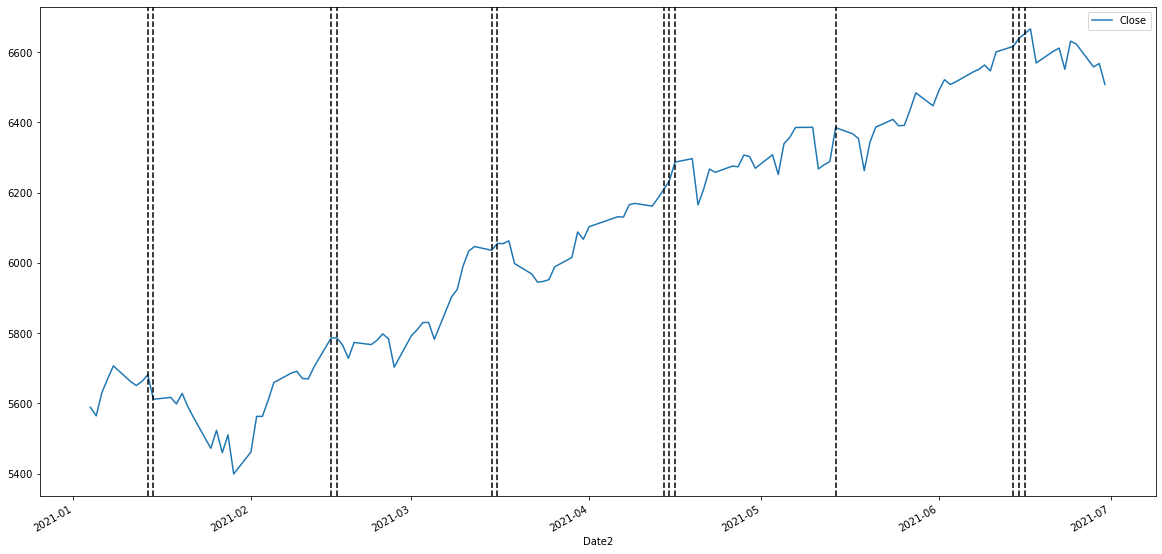

In [272]:
ax = df_cac.plot(x='Date2', y='Close')

for xc in months:
    plt.axvline(x=xc, color='black', linestyle='--')
    
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
    
- La saisonnalité permet de mieux caractériser une série temporelle et, éventuellement de mieux la modéliser

- C'est aussi un phénomène qui créé du bruit : il sera important de pouvoir l'écarter pour mener à bien certaines estimations. 
    
    
<hr style=" border: .5px solid black;">




<br>
    
## Stationnarité au second ordre <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p2.2'></a>    

    
<br>
    
    
- Modélisation en série temporelle : <b>étude obligatoire de la stationnairité</b> !! 

<br>
    
- Nous nous intéresserons qu'à la stationnarité du second ordre / stationnarité faible : le plus courant
    
<br>


    
- Définitions de la stationnarité au second ordre d'un processus $Y_t$ :
    - Le moment d'ordre $2$ est fini et constant au cours du temps (homoscédasticité) : $E(Y_t^2) < \infty$, $\forall t$
    - La moyenne est constante : $E(Y_t) = m$, $\forall t$
    - La covariance entre $t$ et $t+h$ ne dépend que de $h$ : $Cov(Y_t,Y_{t+h}) = \gamma_h$, $\forall t,h$
    
    
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">






  
## Fonction d'autocovariance, d'autocorrélation<font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p2.3'></a>    

<br>
    
- La fonction d'autocovariance est définie, pour un processus $Y_t$ de variance finie, par :
    
$$ \gamma_h = Cov(Y_t,Y_{t+h}) = E((Y_t - E(Y_t))(Y_{t+h} - E(Y_{t+h}))$$

<br>
    
- c'est la covariance d'une même variable entre deux dates.
    
<br>
    
- De là, nous pouvons définir la fonction d'autocorrélation : 
    
$$\rho_h = \frac{\gamma_h}{\gamma_0} $$
    
- elle mesure les liaisons temporelles d'une série. On se sert de la fonction d'autocorrélation pour calculer les corrélogrammes.
    
    
</span>

In [273]:
from statsmodels.graphics.tsaplots import plot_acf

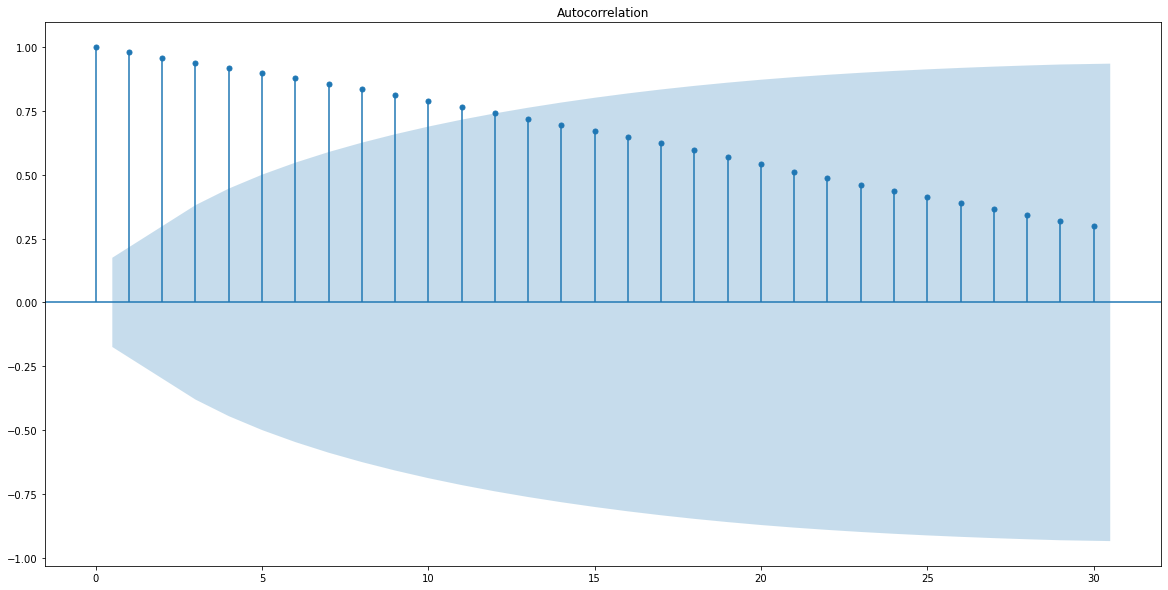

In [275]:
plot_acf(df_cac["Close"], lags=30)
plt.show()

marche aléatoire = AR (1)

modèle AR forte dépendance temporelle

Chaque barre c'est le degré d'autocorrelation

on lis jamais la premère barre AR(0)

A mesure que le temps base l'effet se dilue 

la zone bleu est un interval de confiance si le point est dedans il est non significativement différent de 0

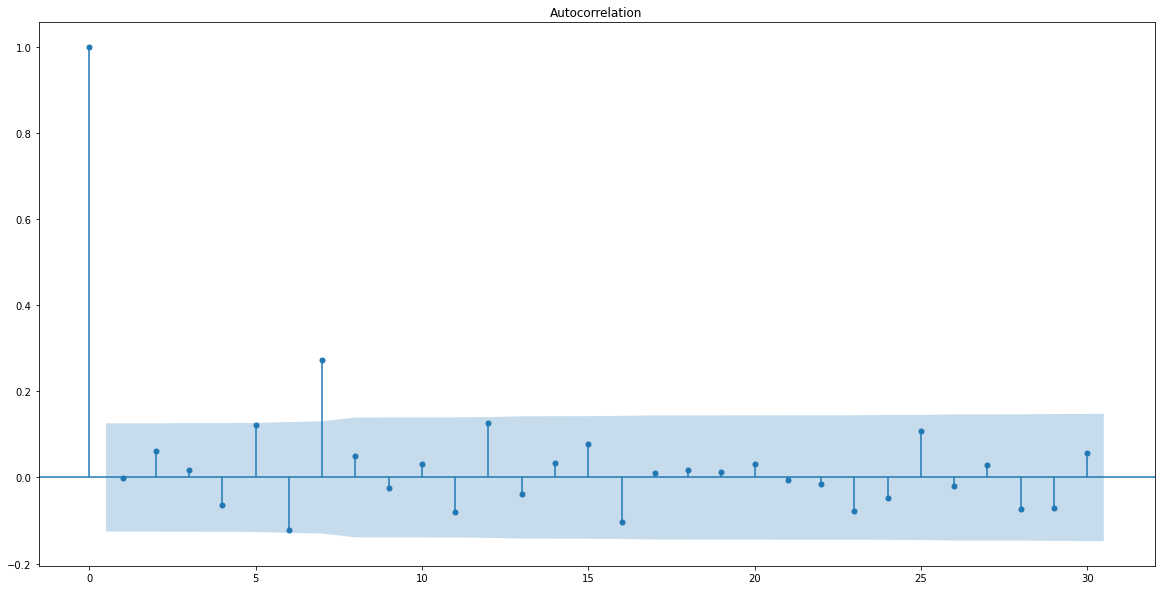

In [279]:
plot_acf(residus_d, lags=30)
plt.show()